In [1]:
import numpy as np
from modules.BS_MixG_model import C_MixG
from modules.BS_Theoretical_Model import BS_Theoretical_Value, add_noise_to_option_values
from matplotlib import pyplot as plt

In [2]:
# 设置随机数种子
np.random.seed(0)

In [3]:
n = 25
# 从1000-1700均匀取25个数
X = np.linspace(1000, 1700, n)
T = 30
r = 0.045
d = 0.025
ST = 1365
tau = T / 365
sigma_0 = 0.2
sigma_1000 = 0.2  # 当 X = 1000 时的波动率
sigma_1700 = 0.4  # 当 X = 1700 时的波动率

设置非参数模型优化问题

In [4]:
def loss(C_pred, C_true):
    if C_pred.shape != C_true.shape:
        raise ValueError("C_pred and C_true should have the same shape")
    return np.mean((C_pred - C_true) ** 2)

In [5]:
BS_Value = BS_Theoretical_Value(X, ST, T, r, d, sigma_1000, sigma_1700)
C_obs = add_noise_to_option_values(BS_Value, X)
# 优化参数
mu = np.random.uniform(low=7.107, high=7.265, size=(n + 1))
pi = np.ones(n + 1) / (n + 1)
C_pred = C_MixG(X, r, tau, sigma_0, mu, pi)
# 损失函数
print("Loss: ", loss(C_pred, C_obs))

Loss:  1077.699357205938


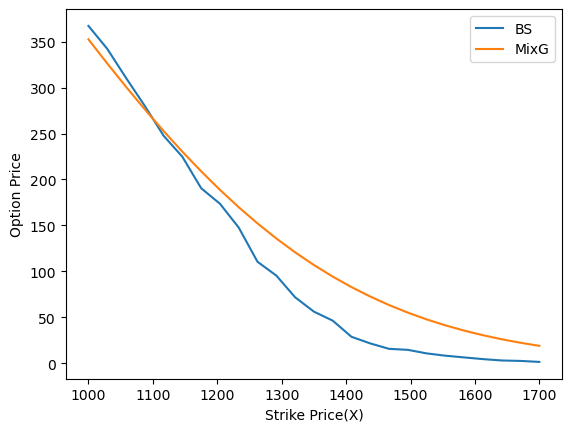

In [6]:
# 绘制图像BS和混合模型的对比
plt.plot(X, C_obs, label='BS')
plt.plot(X, C_pred, label='MixG')
plt.xlabel('Strike Price(X)')
plt.ylabel('Option Price')
plt.legend()
plt.show()